In [1]:
!git clone https://github.com/mindee/doctr.git

Cloning into 'doctr'...
remote: Enumerating objects: 68223, done.
remote: Counting objects: 100% (6466/6466), done.
remote: Compressing objects: 100% (1441/1441), done.
remote: Total 68223 (delta 5085), reused 5668 (delta 4674), pack-reused 61757 (from 1)
Receiving objects: 100% (68223/68223), 83.20 MiB | 11.78 MiB/s, done.
Resolving deltas: 100% (48751/48751), done.


In [1]:
!pip install -q typeguard>=4.0.1

In [2]:
!pip install -q tensorflow-addons

In [3]:
!pip install -qe doctr/.

  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.5/48.5 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 15.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 20.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 912.2/912.2 kB 45.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 67.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 56.3 MB/s eta 0:00:00
  Building editable for python-doctr (pyproject.toml) ... done


In [4]:
!pip install tf2onnx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.8/455.8 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 77.9 MB/s eta 0:00:00


In [1]:
from doctr.io import DocumentFile
from doctr.models import ocr_predictor


In [2]:
model = ocr_predictor(pretrained=True)

  0%|          | 0/66552400 [00:00<?, ?it/s]

  0%|          | 0/63386336 [00:00<?, ?it/s]

In [45]:
document = DocumentFile.from_images("img2.jpg")

In [46]:
result = model(document)

In [5]:
pip install mplcursors

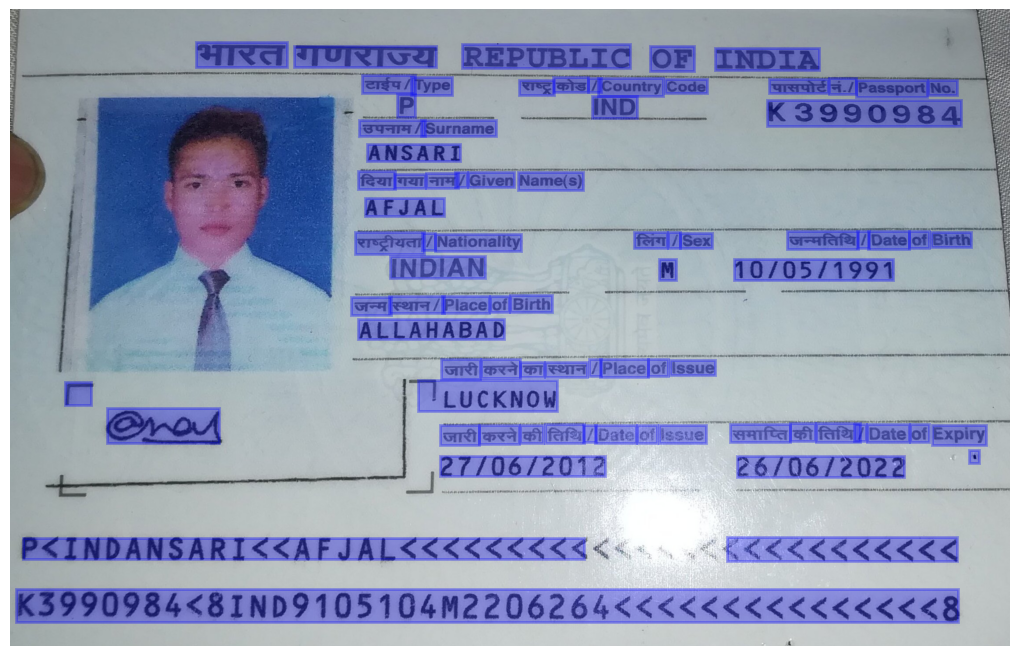

In [47]:
result.show()

In [48]:
json_response = result.export()

In [35]:
import re

In [ ]:
flag= False
len_counter=0
len_date=0
flag= False
len_counter=0
for words in json_response["pages"][0]["blocks"][0]["lines"]:

  if (
    not flag
    and 'A' <= words["words"][0]["value"][0] <= 'Z'  # Check if the first character is a capital letter
    and words["words"][0]["value"][-1].isdigit()      # Check if the last character is a digit
    and 1 <= int(words["words"][0]["value"][-1]) <= 9 # Check if the last digit is between 1 and 9
  ):
      print("Document Number:", words["words"][0]["value"])
      flag = True
  elif len_counter == 8:
      print("First Name:", words["words"][0]["value"])
  elif len_counter == 10:
      print("Last Name:", words["words"][0]["value"])

  len_counter += 1
for words in json_response["pages"][0]["blocks"][0]["lines"]:
    value_str= words["words"][0]["value"]
    if re.match(r"^\d{2}/\d{2}/\d{4}$", value_str):
        if len_date==2 :
          print("Expire Date:", value_str)
          break
        len_date+=1

Document Number: K3990984
First Name: ANSARI
Last Name: AFJAL
Document Date: 26/06/2022
